# Simulated Annealing en TSP

**Victor Manuel Bustillos Alatorre A00227368 ITC**

**Profesor Gildardo Sánchez Ante**

Simulated annealing es un algoritmo estocástico de optimización de búsqueda global. Esto significa que hace uso de la aleatoriedad como parte del proceso de búsqueda.

Es un algoritmo que tiene la probabilidad de aceptar peores soluciones para buscar más allá de posibles máximos/minimos locales.

La probabilidad de aceptar peores soluciones comienza alta al comienzo de la búsqueda y disminuye con el progreso de la búsqueda, lo que le da al algoritmo la oportunidad de ubicar primero la región para los óptimos globales, escapando de los óptimos locales y luego subir la colina hasta el mismo óptimo.

En esta implementación se utiliza SA para resolver el conocido problema de TSP, que se plantea como: "Dada una lista de ciudades y las distancias entre cada par de ciudades, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y regresa a la ciudad de origen?".

Se evalua una nueva solución al cambiar de lugar dos ciudades en el recorrido y aceptando el nuevo estado si es estrictamente mejor o si la probabilidad de aceptación es válida, usando la función de aceptación exp(-delta / t), donde delta es la diferencia entre la solucion actual y la nueva propuesta de solución.

In [1]:
#necessary imports
import matplotlib.pyplot as plt
import random
from math import exp

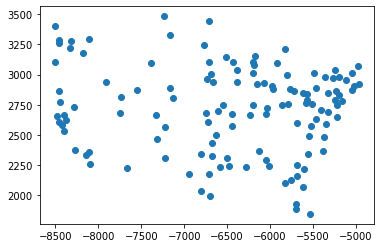

In [2]:
#reading from files
coordinates = [[float(x) for x in line.split()] for line in open("cities.txt", "r")] #cities coordinates
distances = [[float(x) for x in line.split(",")] for line in open("cities_distances.csv", "r")] #cities distances
n = len(coordinates) #number of cities
plt.scatter(*zip(*coordinates)) #plotting city coordinates

In [3]:
#calculates cost given a tour
def cost(tour):
    x = 0
    for i in range(n-1):
        x += distances[tour[i]][tour[i+1]]
    x += distances[tour[n-1]][tour[0]] #returning to start
    return x

#function for acceptance probability
def acceptance(delta, t):
    return exp(-delta / t)

In [7]:
#parameters
alpha = 0.9999 #rate of change for t
steps = 100000 #number of steps
t_0 = 10000 #initial temperature

COST: 41930.0
TOUR: [49, 2, 96, 107, 84, 64, 52, 43, 76, 19, 45, 35, 26, 91, 90, 71, 73, 34, 13, 117, 9, 70, 68, 127, 100, 57, 44, 108, 88, 116, 112, 25, 21, 16, 124, 113, 89, 105, 55, 60, 10, 36, 56, 29, 111, 85, 97, 51, 114, 17, 27, 37, 28, 77, 11, 3, 92, 120, 14, 15, 67, 42, 40, 1, 87, 102, 41, 82, 62, 94, 115, 47, 86, 72, 74, 99, 126, 6, 121, 8, 38, 23, 7, 22, 101, 32, 12, 123, 104, 109, 59, 63, 50, 65, 125, 106, 69, 81, 53, 118, 54, 20, 110, 24, 46, 18, 83, 61, 48, 5, 119, 39, 66, 58, 30, 33, 79, 31, 103, 98, 4, 122, 75, 78, 80, 95, 0, 93]


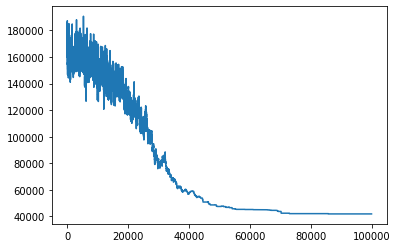

In [8]:
tour = [*range(n)] #initial solution
random.shuffle(tour) #shuffle initial solution
cost_tour = cost(tour)

#graphing data
initial_solution = tour[:] #saving initial solution
x_graph = [*range(steps+1)] #array for graphing steps
cost_graph = [0] * (steps+1) #initializing cost array
cost_graph[0] = cost_tour #setting initial cost
t_graph = [0] * (steps+1) #initializing temperature array
t_graph[0] = t_0 #setting initial temperature

t = t_0

for step in range(1, steps+1):

    #random indexes to swap
    i, j = random.randint(0, n-1), random.randint(0, n-1)
    tour[i], tour[j] = tour[j], tour[i]

    #possible new cost
    new_cost = cost(tour)
    delta = new_cost - cost_tour

    #accept new state
    if delta <= 0 or random.random() <= acceptance(delta, t):
        cost_tour = new_cost
    else:
    #undo swap
        tour[i], tour[j] = tour[j], tour[i]

    cost_graph[step] = cost_tour
    t_graph[step] = t
    t *= alpha

print("COST:", cost_tour)
print("TOUR:", tour)
plt.plot(x_graph, cost_graph)

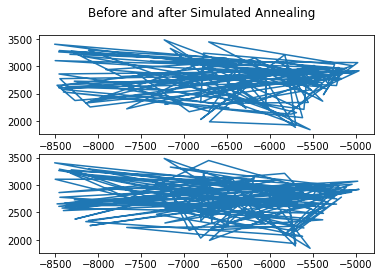

In [9]:
fig, (before, after) = plt.subplots(2)
fig.suptitle('Before and after Simulated Annealing')
before.plot(*zip(*(coordinates[i] for i in initial_solution)))
after.plot(*zip(*(coordinates[i] for i in tour)))

In [10]:
#save result to a file
f = open("result.csv", "w")
f.write("step,cost,temperature\n")
for i in range(steps+1):
    f.write("{},{},{}\n".format(x_graph[i], cost_graph[i], t_graph[i]))
f.close()